In [1]:
import pandas as pd
import openml
from openml.datasets import get_dataset
import polar as pl

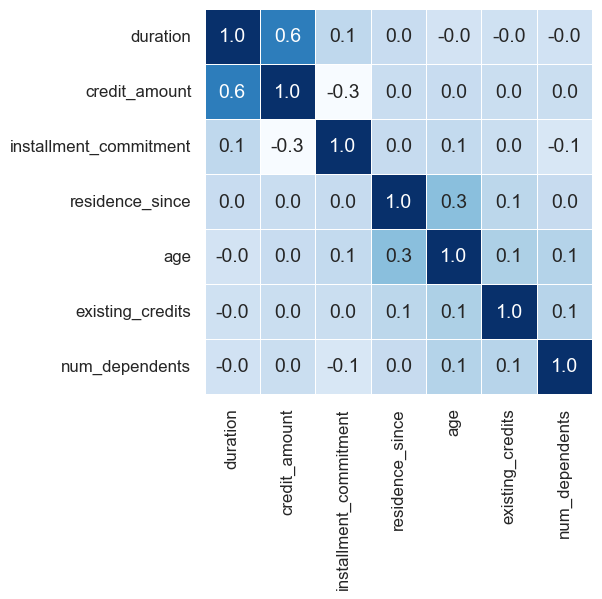

In [2]:
dataset = openml.datasets.get_dataset(31,download_data=True, download_qualities=True,download_features_meta_data=True)
X, y, categorical_indicator, attribute_names = \
dataset.get_data(target=dataset.default_target_attribute,dataset_format='dataframe')

openml_df = pd.DataFrame(X)
openml_df['target'] = y

data_df = pl.analyze_correlation(openml_df,'target')
pl.get_heatmap(data_df,'correlation_heat_map.png',1.1,14,'0.1f',0,100,5,5)

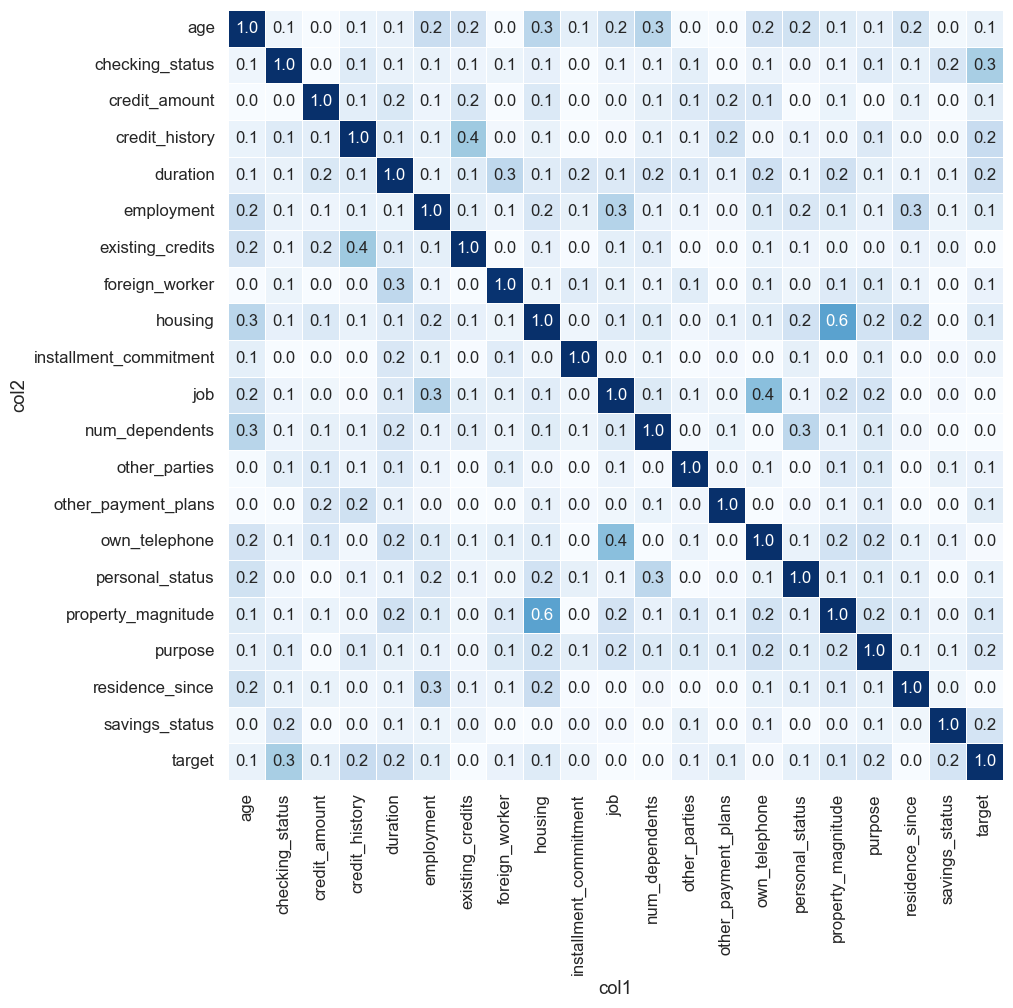

In [3]:
data_df = pl.analyze_association(openml_df,'target',verbose=0)
pl.get_heatmap(data_df,'association_heat_map.png',1.1,12,'0.1f',0,100,10,10)

using RandomForestClassifier


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


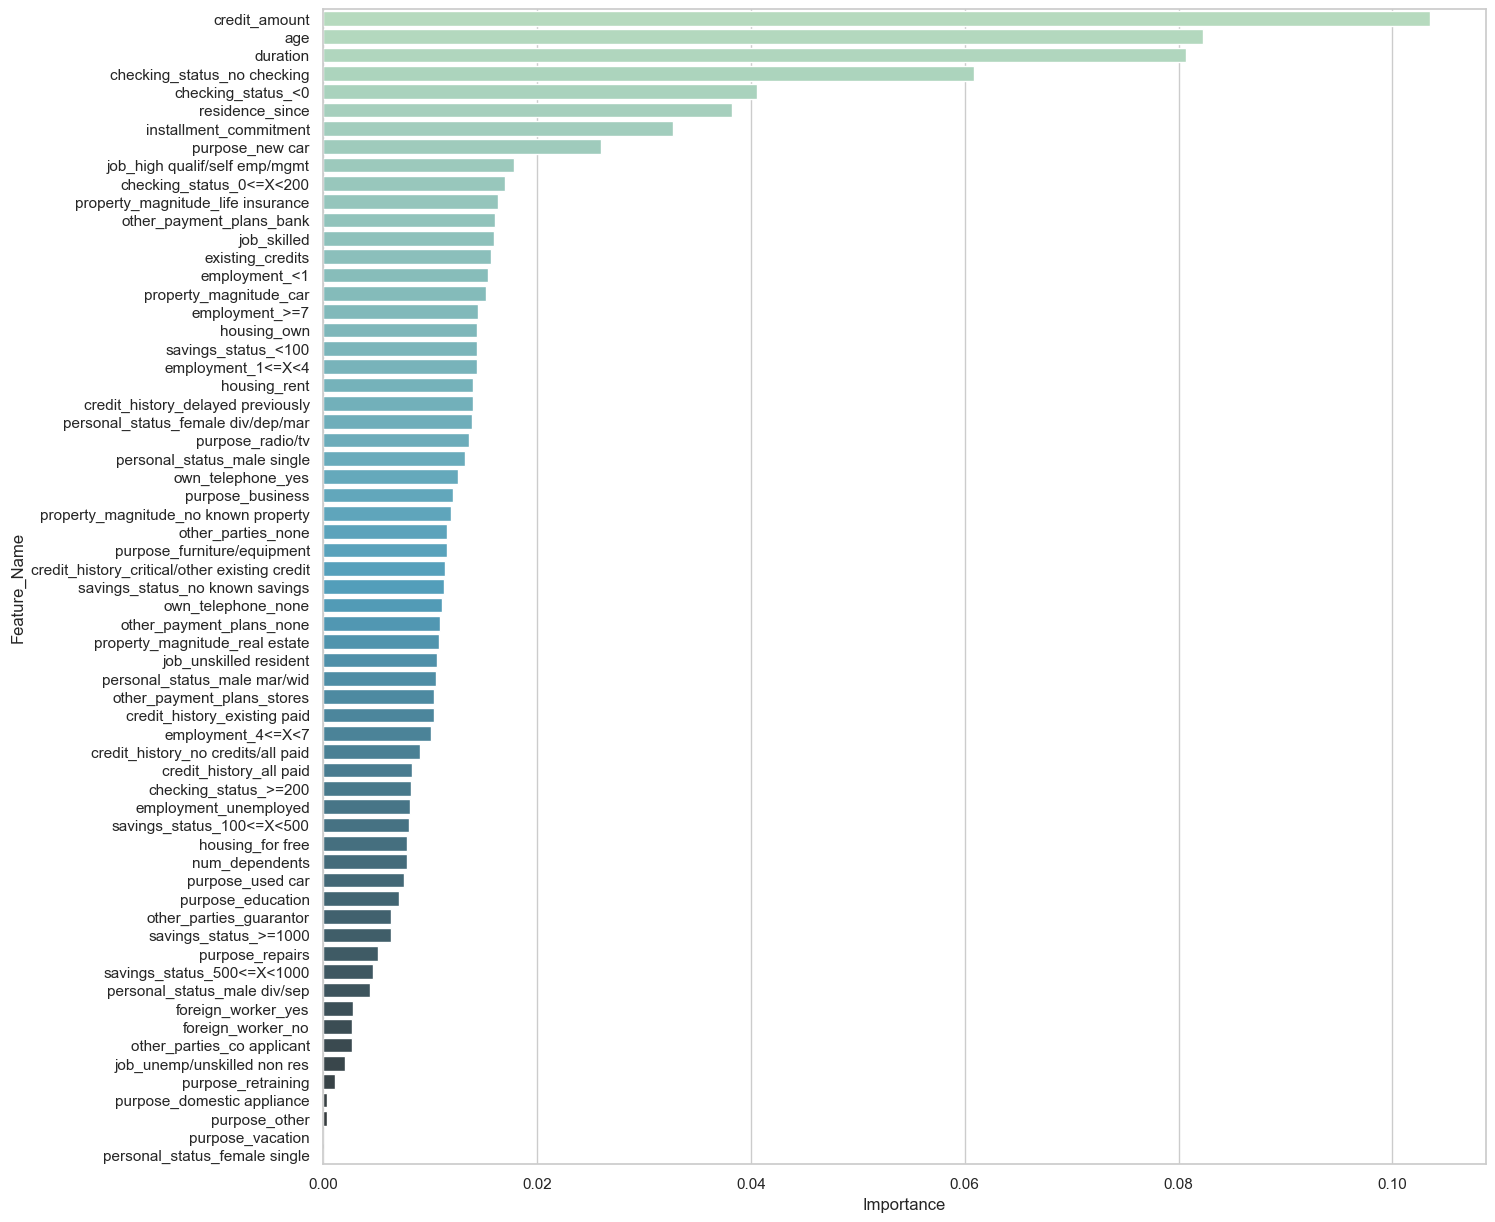

In [4]:
data_df = pl.get_important_features(openml_df,'target')
pl.get_bar(data_df,'important_features.png','Importance','Feature_Name')